# Import Data

In [ ]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

from sklearn.model_selection import train_test_split

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 4

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness']

# Input the Data

In [ ]:
data= pd.read_csv('/content/combine.csv',  header =None,names = ['Text','Emotion'], encoding='utf-8')

X=data['Text']
y=data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


"""
X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)"""

'\nX_train = data_train.Text\nX_test = data_test.Text\n\ny_train = data_train.Emotion\ny_test = data_test.Emotion\n\ndata = data_train.append(data_test, ignore_index=True)'

In [ ]:
X_train, X_test, y_train, y_test

(4575    @GrxjicTank WHY though! Why did u want to offe...
 7076    Doesn't it just suck when you're so real to so...
 2144    When I caused much pain and sorrow to my boyfr...
 9930    It is so exhilarating taking on the challenge ...
 9780      one thing I can say is that you kept me smiling
                               ...                        
 5734    When my life became such a concern to irreleva...
 5191    and naoto nod she also like tha bands. but she...
 5390    #Aleppo city is burning. The head of #terroris...
 860     When my uncle died whom I had loved very much....
 7270    Just wish I was appreciated for all I do! When...
 Name: Text, Length: 7461, dtype: object,
 8537    LGBTQ media should inform, inspire, entertain ...
 483                            Death in the close family.
 8411                            My anger is boiling over.
 7497         Dylon felt dejected. He has a dejected aunt!
 5629    jesus ok an alarming percentage of my teachers...
              

In [ ]:
# temp value

X_train1=X_train
X_test1=X_test

y_train1=y_train
y_test1=y_test

In [ ]:
X_test1[483]

'Death in the close family.'

In [ ]:
print(data.Emotion.value_counts())
data.head(6)

fear       3237
anger      2713
joy        2631
sadness    2555
Name: Emotion, dtype: int64


,Text,Emotion
0,"During the period of falling in love, each tim...",joy
1,When I was involved in a traffic accident.,fear
2,When I was driving home after several days of...,anger
3,When I lost the person who meant the most to me.,sadness
4,When I got a letter offering me the Summer job...,joy
5,When I was going home alone one night in Paris...,fear


In [ ]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

texts = [' '.join(clean_text(text)) for text in data.Text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [ ]:
print(texts_train[92])

I was escorting a relative on a bike , we passed by a dark road á with bushas on each side . Half way down this road , suddenly , we á saw a white dog appear from one side . Before we could do á anything , it had vanished and moreover it did not seem to have á any legs .


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 14357


In [ ]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[   0,    0,    0, ...,    5,  738, 1381],
       [   0,    0,    0, ...,  135,   19,  164],
       [   0,    0,    0, ...,    4,   77,  292],
       ...,
       [   0,    0,    0, ...,  180,   95,   20],
       [   0,    0,    0, ...,   69, 1270, 3211],
       [   0,    0,    0, ...,  141,    3,  624]], dtype=int32)

In [ ]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
}

# Integer labels
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

# Import pretrained word vectors

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [ ]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')


In [ ]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(14358, 300)

In [ ]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 12409
New words found: 1948


# Create CNN Pipeline

### Embedding Layer

In [ ]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

### Model Pipeline

In [ ]:

# Convolution
kernel_size = 3
filters = 256

model = Sequential()
model.add(embedd_layer)
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          4307400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 256)          230656    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 4,604,876
Trainable params: 297,476
Non-trainable params: 4,307,400
_________________________________________________________________


# Train the Model

In [ ]:

batch_size = 256
epochs = 6

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/6
30/30 [==============================] - 90s 3s/step - loss: 1.3438 - accuracy: 0.3655 - val_loss: 1.1112 - val_accuracy: 0.5902
Epoch 2/6
30/30 [==============================] - 84s 3s/step - loss: 0.9688 - accuracy: 0.6491 - val_loss: 0.8077 - val_accuracy: 0.6884
Epoch 3/6
30/30 [==============================] - 84s 3s/step - loss: 0.6527 - accuracy: 0.7596 - val_loss: 0.7345 - val_accuracy: 0.7227
Epoch 4/6
30/30 [==============================] - 84s 3s/step - loss: 0.4798 - accuracy: 0.8477 - val_loss: 0.6817 - val_accuracy: 0.7510
Epoch 5/6
30/30 [==============================] - 85s 3s/step - loss: 0.3337 - accuracy: 0.9076 - val_loss: 0.6848 - val_accuracy: 0.7548
Epoch 6/6
30/30 [==============================] - 84s 3s/step - loss: 0.2335 - accuracy: 0.9394 - val_loss: 0.6761 - val_accuracy: 0.7551


In [ ]:
#model.save("model.h5")

In [ ]:
#from keras.models import load_model
#keras.models.load_model('/content/model.h5')

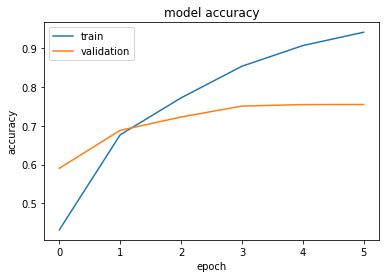

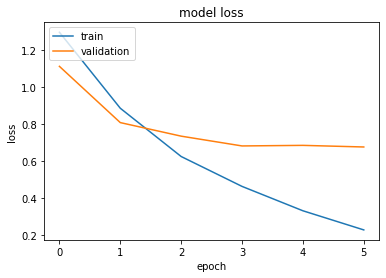

In [ ]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluation

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)

predictions_classname= [class_names[pred] for pred in predictions]
predictions = [pred for pred in predictions]


predict = to_categorical(predictions)
predict 

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predict) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, predict, average='micro') * 100))

Accuracy: 75.51%

F1 Score: 75.51


### Plotting Confusing Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


F1 Score: 75.51


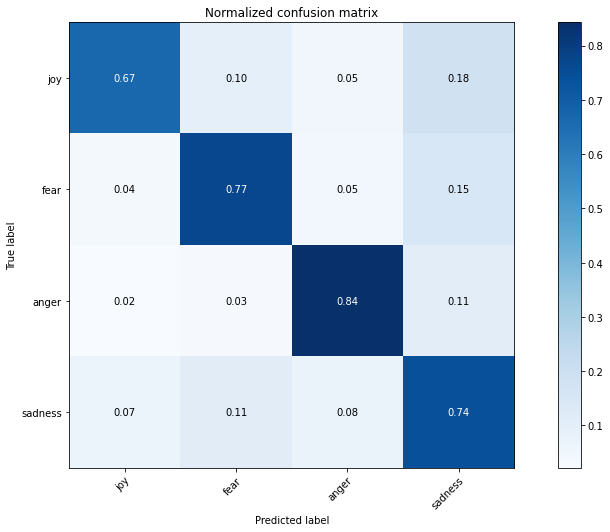

In [ ]:
print("\nF1 Score: {:.2f}".format(f1_score(y_test, predict, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test1, predictions_classname, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:

print('Message: {}\nPredicted: {}'.format(X_test1[483], predictions_classname[483]))

Message: Death in the close family.
Predicted: fear


In [ ]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: fear (0.06 seconds)
